In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv')
cols = [i for i in train.columns]
train.Date = pd.to_datetime(train.Date)

In [3]:
def eda(dataframe):
    print "Dataframe Shape", dataframe.shape
    print ""
    table = pd.DataFrame({"Missing": dataframe.isnull().sum(),
                          "Types": dataframe.dtypes,
                         "Uniques": [dataframe[i].nunique() for i in dataframe]})
    print table
    print ""
    print "Describe Dataframe"
    print dataframe.describe()

In [4]:
train.columns[train.isnull().sum()>0]

Index([u'WetBulb', u'PrecipTotal', u'StnPressure', u'PrecipTotal_date-1',
       u'SeaLevel_date-1', u'Tavg_date-2', u'SeaLevel_date-2',
       u'AvgSpeed_date-2', u'Tavg_date-3', u'WetBulb_date-3',
       u'PrecipTotal_date-3', u'StnPressure_date-3', u'SeaLevel_date-3',
       u'WetBulb_date-4', u'PrecipTotal_date-4', u'SeaLevel_date-4',
       u'WetBulb_date-5', u'StnPressure_date-5'],
      dtype='object')

In [5]:
train.loc[train['Tavg_date-2'].isnull()==True,'Tavg'].mean()

65.0

In [6]:
train.loc[train.Tavg==65.0,'Tavg_date-2'].mean()

68.05882352941177

In [7]:
for i in train.columns[train.isnull().sum()>0]: # for all the columns with nans
    mean_avg_temp = train.loc[train[i].isnull()==True,'Tavg'].mean() # what is the mean Tavg
    mean_i_val = train.loc[train.Tavg==mean_avg_temp,i].mean() # what is i val for that Tavg
    train.loc[train[i].isnull()==True,'to_fill'] = mean_i_val
    train[i] = train[i].fillna(train.to_fill)
    train.drop('to_fill',axis=1,inplace=True)

In [8]:
train.loc[177:201,:].T

,177,178,179,180,181,182,183,184,185,186,...,192,193,194,195,196,197,198,199,200,201
Date,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,...,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-06-29 00:00:00,2007-07-02 00:00:00
Address,"2500 West Grand Avenue, Chicago, IL 60654, USA","2200 North Cannon Drive, Chicago, IL 60614, USA","2200 West 113th Street, Chicago, IL 60643, USA","2200 West 113th Street, Chicago, IL 60643, USA","1100 South Peoria Street, Chicago, IL 60608, USA","2200 West 89th Street, Chicago, IL 60643, USA","1500 North Long Avenue, Chicago, IL 60651, USA","5000 South Central Avenue, Chicago, IL 60638, USA","South Vincennes Avenue, Chicago, IL, USA","University of Illinois at Chicago, 1100 South ...",...,"3000 West 18th Street, Chicago, IL 60608, USA","3000 West 18th Street, Chicago, IL 60608, USA","1000 West 95th Street, Chicago, IL 60643, USA","1000 West 95th Street, Chicago, IL 60643, USA","1000 North Central Park Avenue, Chicago, IL 60...","1000 North Central Park Avenue, Chicago, IL 60...","2000 East 111th Street, Chicago, IL 60628, USA","2000 East 111th Street, Chicago, IL 60628, USA","1100 North Artesian Avenue, Chicago, IL 60622,...","4100 North Oak Park Avenue, Chicago, IL 60634,..."
Species,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX RESTUANS,CULEX PIPIENS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,...,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS
Block,25,22,22,22,11,22,15,50,10,11,...,30,30,10,10,10,10,20,20,11,41
Street,W GRAND AVE,N CANNON DR,W 113TH ST,W 113TH ST,S PEORIA ST,W 89TH ST,N LONG AVE,S CENTRAL AVE,S VINCENNES,S ASHLAND AVE,...,W 18TH ST,W 18TH ST,W 95TH ST,W 95TH ST,N CENTRAL PARK DR,N CENTRAL PARK DR,E 111TH ST,E 111TH ST,S ARTESIAN AVE,N OAK PARK AVE
Trap,T046,T054,T086,T086,T091,T096,T153,T031,T089,T090,...,T043,T043,T085,T085,T030,T030,T084,T084,T160,T002
AddressNumberAndStreet,"2500 W GRAND AVE, Chicago, IL","2200 N CANNON DR, Chicago, IL","2200 W 113TH ST, Chicago, IL","2200 W 113TH ST, Chicago, IL","1100 S PEORIA ST, Chicago, IL","2200 W 89TH ST, Chicago, IL","1500 N LONG AVE, Chicago, IL","5000 S CENTRAL AVE, Chicago, IL","1000 S VINCENNES, Chicago, IL","1100 S ASHLAND AVE, Chicago, IL",...,"3000 W 18TH ST, Chicago, IL","3000 W 18TH ST, Chicago, IL","1000 W 95TH ST, Chicago, IL","1000 W 95TH ST, Chicago, IL","1000 N CENTRAL PARK DR, Chicago, IL","1000 N CENTRAL PARK DR, Chicago, IL","2000 E 111TH ST, Chicago, IL","2000 E 111TH ST, Chicago, IL","1100 S ARTESIAN AVE, Chicago, IL","4100 N OAK PARK AVE, Chicago, IL"
Latitude,41.8911,41.922,41.6883,41.6883,41.8623,41.7319,41.9076,41.8015,41.7232,41.8681,...,41.8574,41.8574,41.7215,41.7215,41.8992,41.8992,41.6926,41.6926,41.903,41.9547
Longitude,-87.6545,-87.6321,-87.6767,-87.6767,-87.6489,-87.6775,-87.7609,-87.7634,-87.65,-87.6669,...,-87.695,-87.695,-87.6481,-87.6481,-87.7168,-87.7168,-87.5989,-87.5989,-87.6883,-87.801
AddressAccuracy,8,8,8,8,8,8,8,9,5,9,...,8,8,8,8,9,9,8,8,8,9


In [9]:
has_nulls = train.loc[train.isnull().any(axis=1),train.columns[train.isnull().sum()>0]]
has_nulls

,WetBulb_date-3,PrecipTotal_date-3,PrecipTotal_date-4,SeaLevel_date-4,StnPressure_date-5
235,60.0,NaN,NaN,30.07,29.36
236,60.0,NaN,NaN,30.07,29.36
237,60.0,NaN,NaN,30.07,29.36
238,60.0,NaN,NaN,30.07,29.36
239,60.0,NaN,NaN,30.07,29.36
240,60.0,NaN,NaN,30.07,29.36
241,60.0,NaN,NaN,30.07,29.36
242,60.0,NaN,NaN,30.07,29.36
243,60.0,NaN,NaN,30.07,29.36
244,60.0,NaN,NaN,30.07,29.36


In [19]:
dates = ['_date-'+str(i) for i in range(1,7)]
for i,v in enumerate(cols):
    try:
        if v in dates: # drops out the repeated date column
            train.drop(v,axis=1,inplace=True)
    except:
        pass
    try:
        if 'Date_date-' in v:
            train.drop(v,axis=1,inplace=True)
    except:
        pass

In [20]:
# need to label encode Species and Trap
from sklearn.preprocessing import LabelEncoder,normalize,StandardScaler
le = LabelEncoder()
le.fit(train.Species)
train['mosquito'] = le.transform(train.Species)
le.fit(train.Trap)
train['trap_e'] = le.transform(train.Trap)
cols = [i for i in train.columns]
X_cols = cols[13:]
X_cols.append('Latitude')
X_cols.append('Longitude')
X_cols.append('AddressAccuracy')
X_cols.append('NumMosquitos')
y = train.dropna()['WnvPresent']

In [21]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,SH_date-6,RA_date-6,\+FC_date-6,SA_date-6,SG_date-6,PO_date-6,PL_date-6,SN_date-6,mosquito,trap_e
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0,0,0,0,0,0,0,2,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0,0,0,0,0,0,0,3,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,0,0,0,0,0,0,0,0,3,6


In [23]:
print X_cols

['Weather_Station', 'T152_dist', 'T153_dist', 'T019_dist', 'T018_dist', 'T156_dist', 'T157_dist', 'T154_dist', 'T155_dist', 'T013_dist', 'T012_dist', 'T011_dist', 'T159_dist', 'T017_dist', 'T016_dist', 'T015_dist', 'T014_dist', 'T151_dist', 'T080_dist', 'T081_dist', 'T082_dist', 'T083_dist', 'T084_dist', 'T085_dist', 'T086_dist', 'T088_dist', 'T089_dist', 'T158_dist', 'T149_dist', 'T148_dist', 'T009Alt_dist', 'T145_dist', 'T144_dist', 'T147_dist', 'T146_dist', 'T141_dist', 'T143_dist', 'T142_dist', 'T903_dist', 'T092_dist', 'T091_dist', 'T090_dist', 'T097_dist', 'T096_dist', 'T095_dist', 'T094_dist', 'T099_dist', 'T222_dist', 'T138_dist', 'T046_dist', 'T128_dist', 'T114_dist', 'T027_dist', 'T025_dist', 'T228_dist', 'T229_dist', 'T900_dist', 'T224_dist', 'T225_dist', 'T226_dist', 'T227_dist', 'T220_dist', 'T221_dist', 'T028_dist', 'T223_dist', 'T044_dist', 'T045_dist', 'T129_dist', 'T047_dist', 'T040_dist', 'T043_dist', 'T048_dist', 'T049_dist', 'T031_dist', 'T030_dist', 'T033_dist', 'T

In [24]:
# Standardize values
X_values = train[X_cols].dropna().values # convert to numpy array
ss = StandardScaler()
X_std = ss.fit_transform(X_values)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
X = X_std
y = train.dropna()['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
def evaluate_model(m):
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred,labels =[0,1])
    class_report = classification_report
    print m,'\n'
    print "Accuracy Score:\t{:0.3}".format(score.round(3)),'\n\n'
    crossval = cross_val_score(m, X, y,cv=7)
    print "Cross Val Scores:", crossval,'\n'
    print "Avg cross val:", np.mean(crossval),'\n'
    print "Predicted Totals:"
    for i,v in enumerate(np.bincount(y)):
        print "class "+str(i)+':' , v
    print "\nConfusion Matrix:"
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 0'],
                         columns=['Predicted 1','Predicted 0'])
    print(confusion),'\n'
    print "Classification Report:"
    print(classification_report(y_test, y_pred, target_names=['0','1']))
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [36]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.94826048171275645

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

Accuracy Score:	0.948 


Cross Val Scores: [ 0.87234043  0.17089911  0.78419244  0.7814433   0.62817869  0.53883162
  0.43436426] 

Avg cross val: 0.601464263224 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           13          152
Actual 0           22         3176 

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      3198
          1       0.37      0.08      0.13       165

avg / total       0.93      0.95      0.93      3363



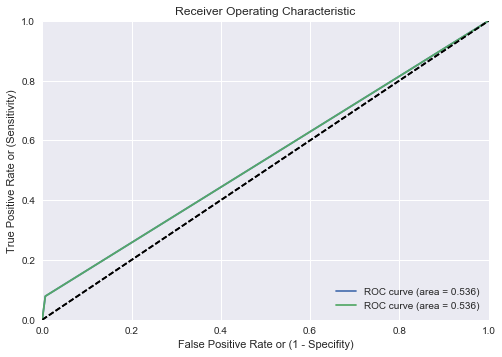

In [39]:
evaluate_model(lr)

In [32]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
print fpr, tpr, thresholds

[ 0.         0.0068793  1.       ] [ 0.          0.07878788  1.        ] [2 1 0]


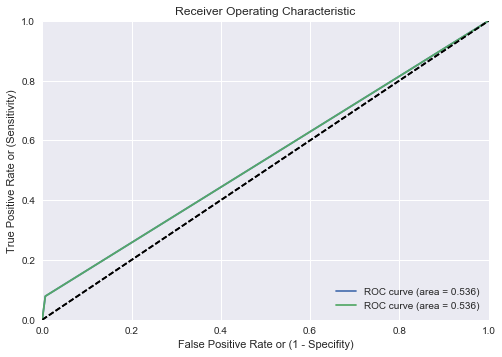

In [34]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 

Accuracy Score:	0.939 


Cross Val Scores: [ 0.94783802  0.26286891  0.81168385  0.94845361  0.6838488   0.78006873
  0.40412371] 

Avg cross val: 0.691269375173 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           18          147
Actual 0           59         3139 

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      3198
          1       0.23      0.11      0.15       165

avg / total       0.92      0.94      0.93      3363



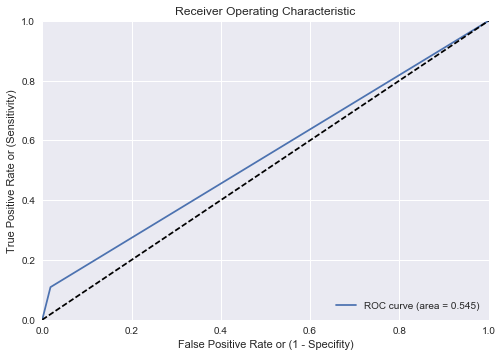

In [43]:
clf = RandomForestClassifier()
evaluate_model(clf)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 

Accuracy Score:	0.948 


Cross Val Scores: [ 0.92381606  0.35827042  0.93127148  0.94845361  0.83573883  0.77525773
  0.39793814] 

Avg cross val: 0.738678038983 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           10          155
Actual 0           21         3177 

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      3198
          1       0.32      0.06      0.10       165

avg / total       0.92      0.95      0.93      3363



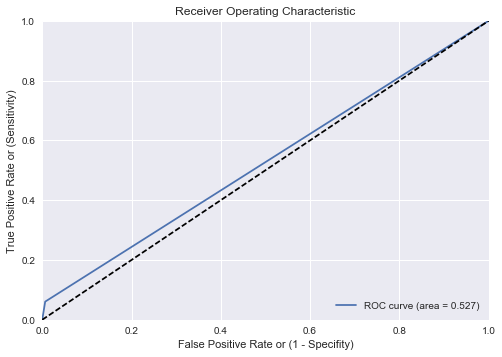

In [46]:
clf = AdaBoostClassifier()
evaluate_model(clf)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10,svd_solver='full')
pca.fit(X)
X_pca = pca.transform(X)
print pca.explained_variance_ratio_
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33)

[ 0.33207339  0.14743757  0.05621344  0.05260143  0.02602569  0.02423354
  0.02188525  0.01764656  0.01626671  0.01314682]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 

Accuracy Score:	0.948 


Cross Val Scores: [ 0.94783802  0.26286891  0.76701031  0.94845361  0.62680412  0.64329897
  0.35738832] 

Avg cross val: 0.650523179788 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           23          142
Actual 0           34         3164 

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      3198
          1       0.40      0.14      0.21       165

avg / total       0.93      0.95      0.94      3363



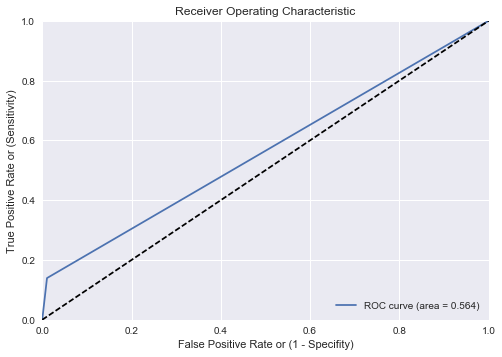

In [68]:
# Running after applying PCA
clf = RandomForestClassifier(min_samples_split=6,max_features=.5,max_depth=None)
evaluate_model(clf)